In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from numpy import median

In [22]:
df = pd.read_csv("setapProcessT1.csv")
# df.head()
df['SE Process grade'].replace(to_replace=["A","F"], value=["1","2"],inplace=True)
# df.head()

In [23]:
X = df.iloc[:, [0,83]].values
y = df.iloc[:, 84].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## SVM Classifier

In [29]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [48]:
# c = classifier.fit(X_train, y_train).predict(X_test)
# print(c)
# # print(classification_report(y_test, y_predict, target_names=c))
# print(confusion_matrix(y_test, c))

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
[[11  0]
 [ 5  0]]


In [49]:
accuracies_svm = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies_svm.mean()

0.65

In [40]:
print(type(accuracies_svm))
print(y_test)
accuracies_svm_new = accuracies_svm.astype(np.float)
print(accuracies_svm_new)

<class 'numpy.ndarray'>
['1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '2' '2' '2' '2' '1']
[1.         0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]


In [41]:
accuracies_svm.std()

0.08068715304598786

In [42]:
cm = confusion_matrix(y_test, accuracies_svm)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

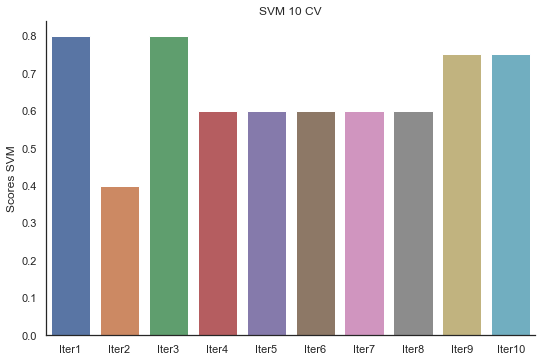

In [346]:
scores_10_svm = pd.DataFrame(accuracies_svm,columns=['Scores SVM'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores SVM', kind='bar', data = scores_10_svm, height=5, aspect=1.5)

plt.title("SVM 10 CV")
plt.show()

In [347]:
accuracies_svm_new = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
accuracies_svm_new.mean()

0.6466666666666666

In [348]:
accuracies_svm_new.std()

0.0748331477354788

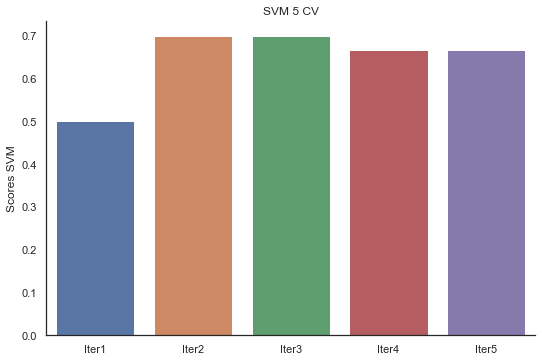

In [349]:
scores_5_svm = pd.DataFrame(accuracies_svm_new,columns=['Scores SVM'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores SVM', kind='bar', data = scores_5_svm, height=5, aspect=1.5)
plt.title("SVM 5 CV")
plt.show()

## KNN Classifier

In [350]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [351]:
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
accuracies_knn.mean()

0.6900000000000001

In [352]:
accuracies_knn.std()

0.09165151389911683

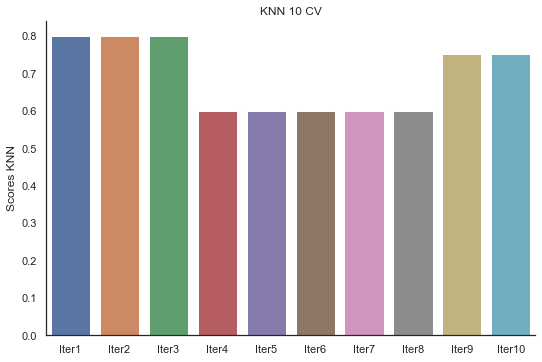

In [353]:
scores_10_knn = pd.DataFrame(accuracies_knn,columns=['Scores KNN'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores KNN', kind='bar', data = scores_10_knn, height=5, aspect=1.5)
plt.title("KNN 10 CV")
plt.show()

In [354]:
accuracies_knn_new = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5)
accuracies_knn_new.mean()

0.6866666666666665

In [355]:
accuracies_knn_new.std()

0.016329931618554516

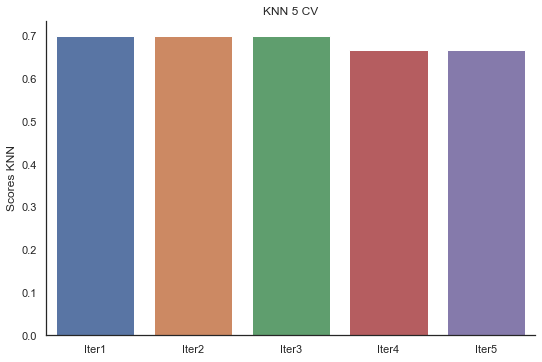

In [356]:
scores_5_knn = pd.DataFrame(accuracies_knn_new,columns=['Scores KNN'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores KNN', kind='bar', data = scores_5_knn, height=5, aspect=1.5)
plt.title("KNN 5 CV")
plt.show()

## Random Forest Classifier

In [423]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [424]:
accuracies_random_forest = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = 10)
accuracies_random_forest.mean()

0.695

In [425]:
accuracies_random_forest.std()

0.15882380174268593

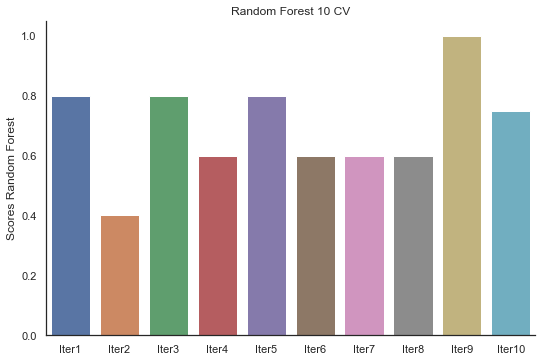

In [426]:
scores_10_random_forest = pd.DataFrame(accuracies_random_forest,columns=['Scores Random Forest'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores Random Forest', kind='bar', data = scores_10_random_forest, height=5, aspect=1.5)
plt.title("Random Forest 10 CV")
plt.show()

In [427]:
accuracies_random_forest_new = cross_val_score(estimator = random_forest, X = X_train, y = y_train, cv = 5)
accuracies_random_forest_new.mean()

0.7288888888888889

In [428]:
accuracies_random_forest_new.std()

0.05096597751635432

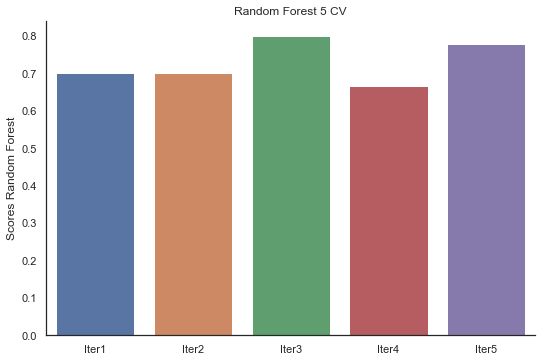

In [429]:
scores_5_random_forest = pd.DataFrame(accuracies_random_forest_new,columns=['Scores Random Forest'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores Random Forest', kind='bar', data = scores_5_random_forest, height=5, aspect=1.5)
plt.title("Random Forest 5 CV")
plt.show()

## Decision Tree Classifier

In [369]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [370]:
accuracies_decision_tree = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = 10)
accuracies_decision_tree.mean()

0.735

In [371]:
accuracies_decision_tree.std()

0.12658988901172163

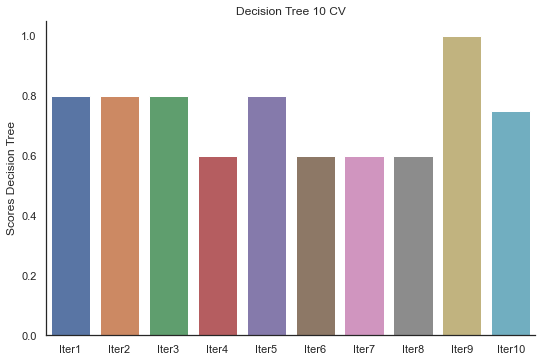

In [372]:
scores_10_decision_tree = pd.DataFrame(accuracies_decision_tree,columns=['Scores Decision Tree'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores Decision Tree', kind='bar', data = scores_10_decision_tree, height=5, aspect=1.5)
plt.title("Decision Tree 10 CV")
plt.show()

In [373]:
accuracies_decision_tree_new = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = 5)
accuracies_decision_tree_new.mean()

0.7288888888888889

In [374]:
accuracies_decision_tree_new.std()

0.05096597751635432

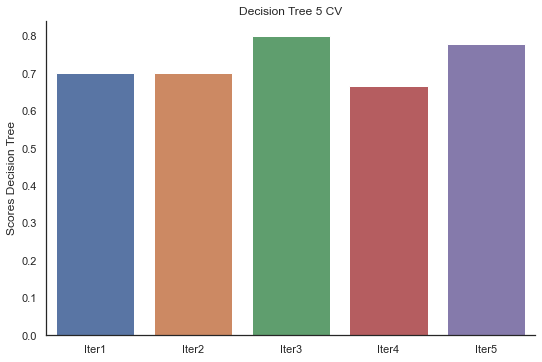

In [375]:
scores_5_decision_tree = pd.DataFrame(accuracies_decision_tree_new,columns=['Scores Decision Tree'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores Decision Tree', kind='bar', data = scores_5_decision_tree, height=5, aspect=1.5)
plt.title("Decision Tree 5 CV")
plt.show()

## Naive Bayes Classifier

In [377]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [378]:
accuracies_gnb = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv = 10)
accuracies_gnb.mean()

0.6300000000000001

In [379]:
accuracies_gnb.std()

0.13999999999999999

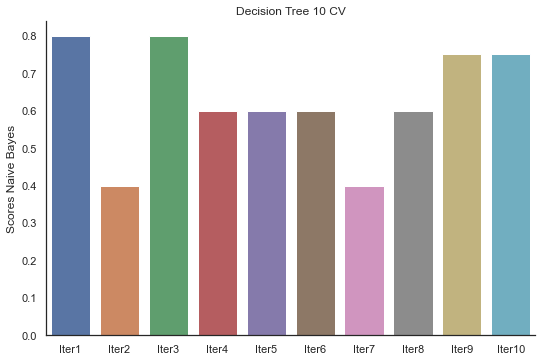

In [380]:
scores_10_gnb = pd.DataFrame(accuracies_gnb,columns=['Scores Naive Bayes'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores Naive Bayes', kind='bar', data = scores_10_gnb, height=5, aspect=1.5)
plt.title("Decision Tree 10 CV")
plt.show()

In [381]:
accuracies_gnb_new = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv = 5)
accuracies_gnb_new.mean()

0.6466666666666666

In [382]:
accuracies_gnb_new.std()

0.0748331477354788

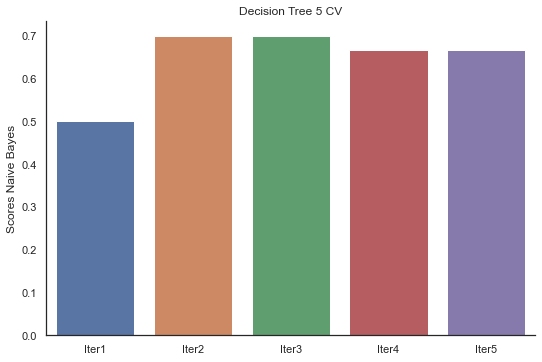

In [383]:
scores_5_gnb = pd.DataFrame(accuracies_gnb_new,columns=['Scores Naive Bayes'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores Naive Bayes', kind='bar', data = scores_5_gnb, height=5, aspect=1.5)
plt.title("Decision Tree 5 CV")
plt.show()

## Gaussian Process Classifier

In [385]:
gaussian_pc = GaussianProcessClassifier()
gaussian_pc.fit(X_train, y_train)
y_pred = gaussian_pc.predict(X_test)

In [386]:
accuracies_gaussian_pc = cross_val_score(estimator = gaussian_pc, X = X_train, y = y_train, cv = 10)
accuracies_gaussian_pc.mean()

0.65

In [387]:
accuracies_gaussian_pc.std()

0.11832159566199232

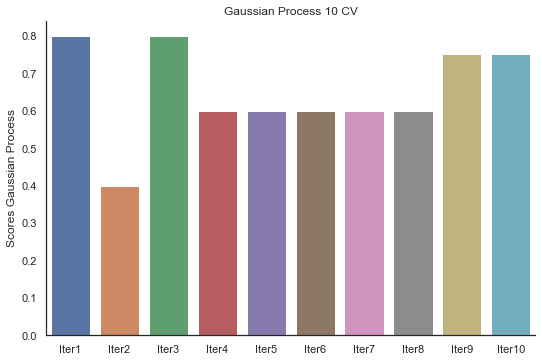

In [391]:
scores_10_gaussian_pc = pd.DataFrame(accuracies_gaussian_pc,columns=['Scores Gaussian Process'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores Gaussian Process', kind='bar', data = scores_10_gaussian_pc, height=5, aspect=1.5)
plt.title("Gaussian Process 10 CV")
plt.show()

In [389]:
accuracies_gaussian_pc_new = cross_val_score(estimator = gaussian_pc, X = X_train, y = y_train, cv = 5)
accuracies_gaussian_pc_new.mean()

0.6466666666666666

In [392]:
accuracies_gaussian_pc_new.std()

0.0748331477354788

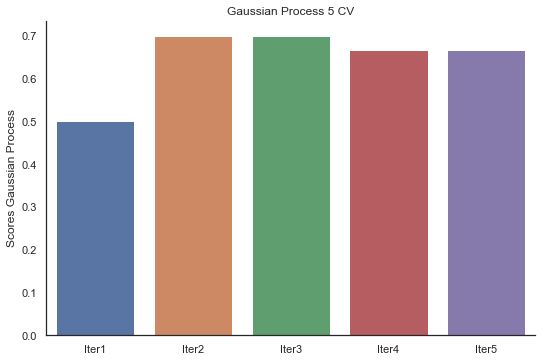

In [393]:
scores_5_gaussian_pc = pd.DataFrame(accuracies_gaussian_pc_new,columns=['Scores Gaussian Process'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores Gaussian Process', kind='bar', data = scores_5_gaussian_pc, height=5, aspect=1.5)
plt.title("Gaussian Process 5 CV")
plt.show()

## MLP Classifier 

In [413]:
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

In [414]:
accuracies_mlp = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 10)
accuracies_mlp.mean()

0.6900000000000001

In [415]:
accuracies_mlp.std()

0.09165151389911683

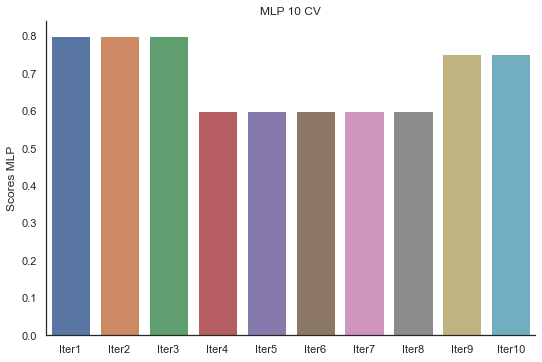

In [416]:
scores_10_mlp = pd.DataFrame(accuracies_mlp,columns=['Scores MLP'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores MLP', kind='bar', data = scores_10_mlp, height=5, aspect=1.5)
plt.title("MLP 10 CV")
plt.show()

In [417]:
accuracies_mlp_new = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 5)
accuracies_mlp_new.mean()

0.6866666666666665

In [418]:
accuracies_mlp_new.std()

0.016329931618554516

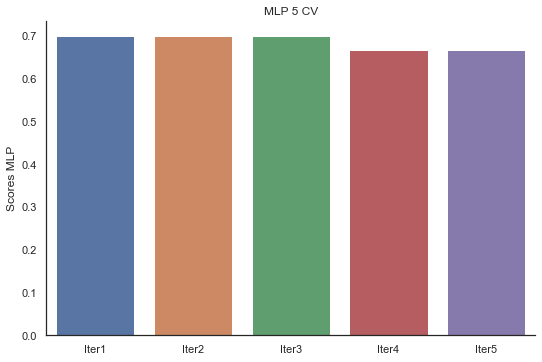

In [419]:
scores_5_mlp = pd.DataFrame(accuracies_mlp_new,columns=['Scores MLP'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores MLP', kind='bar', data = scores_5_mlp, height=5, aspect=1.5)
plt.title("MLP 5 CV")
plt.show()

## AdaBoost Classifier

In [433]:
adaBoost_cf = AdaBoostClassifier()
adaBoost_cf.fit(X_train, y_train)
y_pred = adaBoost_cf.predict(X_test)

In [434]:
accuracies_adaBoost_cf = cross_val_score(estimator = adaBoost_cf, X = X_train, y = y_train, cv = 10)
accuracies_adaBoost_cf.mean()

0.695

In [435]:
accuracies_adaBoost_cf.std()

0.15882380174268593

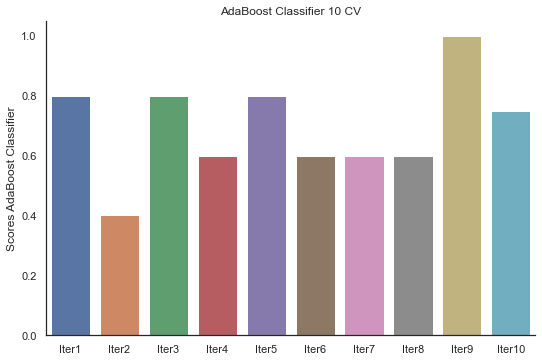

In [436]:
scores_10_adaBoost_cf = pd.DataFrame(accuracies_adaBoost_cf,columns=['Scores AdaBoost Classifier'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores AdaBoost Classifier', kind='bar', data = scores_10_adaBoost_cf, height=5, aspect=1.5)
plt.title("AdaBoost Classifier 10 CV")
plt.show()

In [437]:
accuracies_adaBoost_cf_new = cross_val_score(estimator = adaBoost_cf, X = X_train, y = y_train, cv = 5)
accuracies_adaBoost_cf_new.mean()

0.6888888888888889

In [438]:
accuracies_adaBoost_cf_new.std()

0.1063420987911591

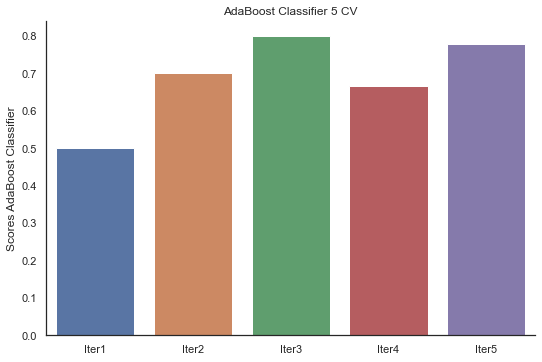

In [439]:
scores_5_adaBoost_cf = pd.DataFrame(accuracies_adaBoost_cf_new,columns=['Scores AdaBoost Classifier'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores AdaBoost Classifier', kind='bar', data = scores_5_adaBoost_cf, height=5, aspect=1.5)
plt.title("AdaBoost Classifier 5 CV")
plt.show()

## Quadratic Discriminant Analysis 

In [441]:
qda_cf = QuadraticDiscriminantAnalysis()
qda_cf.fit(X_train, y_train)
y_pred = qda_cf.predict(X_test)

D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:836: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [442]:
accuracies_qda_cf = cross_val_score(estimator = qda_cf, X = X_train, y = y_train, cv = 10)
accuracies_qda_cf.mean()

D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:836: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysi

0.6900000000000001

In [443]:
accuracies_qda_cf.std()

0.09165151389911683

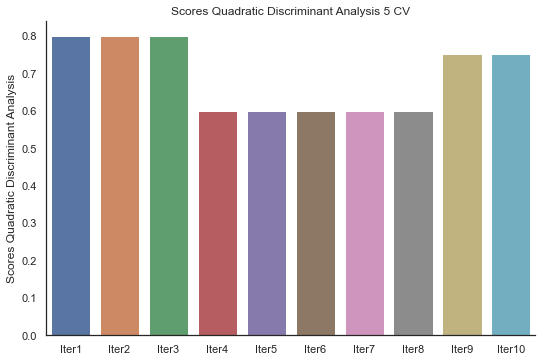

In [447]:
scores_10_qda_cf = pd.DataFrame(accuracies_qda_cf,columns=['Scores Quadratic Discriminant Analysis'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5','Iter6','Iter7','Iter8','Iter9','Iter10'],
            y = 'Scores Quadratic Discriminant Analysis', kind='bar', data = scores_10_qda_cf, height=5, aspect=1.5)
plt.title("Scores Quadratic Discriminant Analysis 5 CV")
plt.show()

In [445]:
accuracies_qda_cf_new = cross_val_score(estimator = qda_cf, X = X_train, y = y_train, cv = 5)
accuracies_qda_cf_new.mean()

D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:836: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\Important\Anaconda\envs\keras-gpu\lib\site-packages\sklearn\discriminant_analysi

0.6866666666666665

In [446]:
accuracies_qda_cf_new.std()

0.016329931618554516

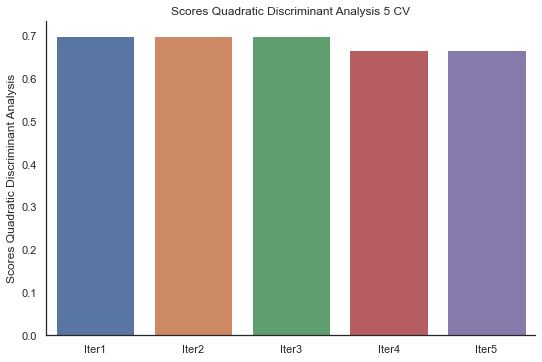

In [448]:
scores_5_qda_cf = pd.DataFrame(accuracies_qda_cf_new,columns=['Scores Quadratic Discriminant Analysis'])
sns.catplot(x = ['Iter1','Iter2','Iter3','Iter4','Iter5'],
            y = 'Scores Quadratic Discriminant Analysis', kind='bar', data = scores_5_qda_cf, height=5, aspect=1.5)
plt.title("Scores Quadratic Discriminant Analysis 5 CV")
plt.show()